# Compulsory Assignment 1 - Pandas and visualizations
### Tonje Martine Lorgen Kirkholt

### Imports

In [328]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


---
## Loading and exploring the dataset

__1. Load the dataset named `airbnb.csv` and store it in a dataframe called `raw_df`. Use the column named `ìd` as the index column for the dataframe__

In [329]:
# Loading the dataset and storing it in a dataframe called raw_df
raw_df = pd.read_csv('assets/airbnb.csv')

#Setting column id as index column
raw_df = raw_df.set_index('id')

__2. Print the first `five` rows of the dataframe__

In [330]:
# Specifying with df.head() how many rows to view
raw_df.head(5)

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,state,city
id,,,,,,,,,,,,,,,
183319,Panoramic Ocean View Venice Beach,867995,Barbara X,Venice,33.99211,-118.47600,Entire home/apt,152,30,3,2,0,0,CA,Los Angeles
109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Culver City,33.98301,-118.38607,Entire home/apt,115,30,2,1,139,0,CA,Los Angeles
51307,Spanish Bungalow Guest House LA CA. 30 plus ni...,235568,David,Atwater Village,34.12206,-118.26783,Entire home/apt,75,30,138,2,224,0,CA,Los Angeles
184314,Boho Chic Flat..Steps to Beach!,884031,Ashley,Venice,33.97487,-118.46312,Entire home/apt,125,30,30,1,0,0,CA,Los Angeles
51498,Guest House With Its Own Entrance/Exit and Hot...,236758,Bay,Mar Vista,34.00389,-118.44126,Entire home/apt,189,3,378,1,348,41,CA,Los Angeles


__3. How many unique values exist in each of the columns `state` and `city`?__

In [331]:
# Using nunique() to return the number of distinct values in the chosen column
# Done for columns state and city
raw_df.state.nunique()

19

In [332]:
raw_df.city.nunique()

31

__4. Identify missing (NaN) values in each of the columns in the dataset__

In [333]:
# Using isna() to detect missing values, and sum() to sum each column
raw_df.isna().sum()

name                                19
host_id                              0
host_name                         1144
neighbourhood                      712
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
state                                0
city                                 0
dtype: int64

__5. Create a copy of `raw_df` named `df`. Remove any rows containing NaN values in the new dataframe. What is the shape of `df` before and after removing the NaN values?__

In [334]:
# Creating a new dataframe by making a copy using copy()
df = raw_df.copy()

# Shape before removing the NaN values
df.shape

(325858, 15)

In [335]:
# Using dropna() to remove missing values from the new dataframe
df = df.dropna()

# Shape after removing the NaN values
df.shape

(323983, 15)

We can see that the number of rows have decreased by 1875.

__6. Which `room_type`, `state` and `city` is the most popular (by number of instances)? Print the name and count of each__

Hint: The output should look something like this:
```python
Column: [col], Most popular: [name], Count: [count]
Column: [col], Most popular: [name], Count: [count]
Column: [col], Most popular: [name], Count: [count]
```

In [336]:
# Creating lists with the information to use in for-loop printing
columns_print = [df.columns[6], df.columns[13], df.columns[14]]
most_pop = [df.room_type.mode()[0], df.state.mode()[0], df.city.mode()[0]]
count = [df.room_type.value_counts().max(), df.state.value_counts().max(), df.city.value_counts().max()]

In [337]:
for col, mpop, count in zip(columns_print, most_pop, count):
    print('Column:', col, ",  Most popular:", mpop, ",  Count:", count)

Column: room_type ,  Most popular: Entire home/apt ,  Count: 241433
Column: state ,  Most popular: CA ,  Count: 127206
Column: city ,  Most popular: Los Angeles ,  Count: 91600


In [338]:
# Printing each line
print('Column:', df.columns[6], ', Most popular:', df.room_type.mode()[0], ', Count: ', df.room_type.value_counts().max())
print('Column:', df.columns[13], ', Most popular:', df.state.mode()[0], ', Count: ', df.state.value_counts().max())
print('Column:', df.columns[14], ', Most popular:', df.city.mode()[0], ', Count: ', df.city.value_counts().max())

Column: room_type , Most popular: Entire home/apt , Count:  241433
Column: state , Most popular: CA , Count:  127206
Column: city , Most popular: Los Angeles , Count:  91600


In [339]:
# Using the tabulate module to get a better output
from tabulate import tabulate
dict = {'Column':[df.columns[6], df.columns[13], df.columns[14]],
       'Most popular':[df.room_type.mode()[0], df.state.mode()[0], df.city.mode()[0]],
       'Count': [df.room_type.value_counts().max(), df.state.value_counts().max(), df.city.value_counts().max()]}

In [340]:
table_result = pd.DataFrame(dict)

In [341]:
print(tabulate(table_result, headers = 'keys', tablefmt = 'presto'))

    | Column    | Most popular    |   Count
----+-----------+-----------------+---------
  0 | room_type | Entire home/apt |  241433
  1 | state     | CA              |  127206
  2 | city      | Los Angeles     |   91600


__7. What is the average and median `price` for a listing?__

In [342]:
# Average price for a listing

average_listing_price = round(df.loc[:, 'price'].mean(), 2)
print('Average price for a listing:', average_listing_price)

Average price for a listing: 285.13


In [343]:
# Median price for a listing

median_listing_price = round(df.loc[:, 'price'].median(), 2)
print('Median price for a listing:', median_listing_price)

Median price for a listing: 159.0


__8. What is the average price for the states `CA`, `FL` and `NY`?__

Hint: The output should look something like this:
```python
State: [col], Average price: [price]
State: [col], Average price: [price]
State: [col], Average price: [price]
```

In [344]:
# Create a new table with only state and price
state_price = df[['state', 'price']]

# Creating a list with the specified states to use
states = ['CA', 'FL', 'NY']

# Using loc to access lines belonging to the states in the list above
state_price = state_price.loc[df['state'].isin(states)]

In [345]:
# For each state, calculate the average price

avg_CA = state_price.loc[state_price['state'] == 'CA']
avg_CA = round(avg_CA['price'].mean(), 2)

avg_FL = state_price.loc[state_price['state'] == 'FL']
avg_FL = round(avg_FL['price'].mean(), 2)

avg_NY = state_price.loc[state_price['state'] == 'NY']
avg_NY = round(avg_NY['price'].mean(), 2)

avg_prices = [avg_CA, avg_FL, avg_NY]

In [346]:
for state, price in zip(states, avg_prices):
    print(f'State: [{state}], Average price:, [{price}]')

State: [CA], Average price:, [288.4]
State: [FL], Average price:, [241.99]
State: [NY], Average price:, [197.22]


In [347]:
dict = {'State': ['CA', 'FL', 'NY'],
       'Average price': [avg_CA, avg_FL, avg_NY]}
table_result = pd.DataFrame(dict)

In [348]:
print(tabulate(table_result, headers = 'keys', tablefmt = 'presto'))

    | State   |   Average price
----+---------+-----------------
  0 | CA      |          288.4
  1 | FL      |          241.99
  2 | NY      |          197.22


__9. Create a new dataframe called `df_beach` containing all listings with "beach" in the `name`. Print out the shape of `beach_df`__

The filtering should not be case sensitive, meaning that names containing `beach`, `Beach`, `BeAcH` etc. all should be included


In [349]:
# Creating a copy of the dataframe df where the null values have been removed
df_beach= df.copy()

# Printing the shape
df_beach.shape

(323983, 15)

In [350]:
# Making sure that the content of the name-column is lower-cased
df_beach['name'] = df_beach['name'].str.lower()

# Keeping only the listings with "beach" in the name
df_beach = df_beach[df_beach.name.str.contains('beach')]

# Printing the shape after making the changes to the dataset
df_beach.shape

(31436, 15)

In [351]:
# Shape can be seen at the end of the dataframe print-out above as well
df_beach_shape = df_beach.shape
print('\nDataFrame Shape :', df_beach_shape)
print('\nNumber of rows :', df_beach_shape[0])
print('\nNumber of columns :', df_beach_shape[1])


DataFrame Shape : (31436, 15)

Number of rows : 31436

Number of columns : 15


---

## Visualizing the dataset

__10. Create plot with 2 vertical axes and one horizontal axes. The plot should display a barchart containing the `count` of the `10 most popular` states and cities, each in its own subplot. The bars should be sorted in descending order.__

Use `df` in all tasks in this section

Hint: It is recommended to use the `Barplot` function built into Seaborn for barcharts.

The output should look something like this:

<img src="assets/ex10.png"
     alt="Barchart example"/>

PS: Disregard the color scheme of the example image.

In [352]:
# Creating a new dataframe for states and cities, in additien to the value counts for each
top_states = pd.DataFrame(df.state.value_counts().reset_index().values, columns=['state', 'count'])
top_states = top_states.sort_values(by=['count'], ascending=False)

top_cities = pd.DataFrame(df.city.value_counts().reset_index().values, columns=['city', 'count'])
top_cities = top_cities.sort_values(by=['count'], ascending=False)

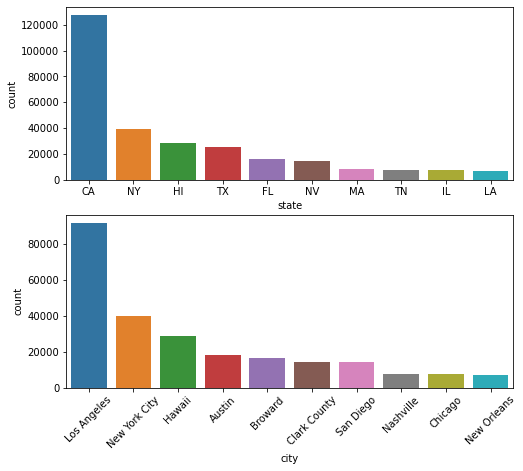

In [353]:
# Using subplots() to create a figure and a grid of subplots
# The specified parameters will apply for all added plots

fig, ax = plt.subplots(2, 1, figsize=(8, 7))
sns.barplot(data=top_states.head(10), x='state', y='count', ax=ax[0])
sns.barplot(data=top_cities.head(10), x='city', y='count', ax=ax[1])
plt.xticks(rotation=45)
plt.show()


__11. Create a scatterplot with the longitude and latitude of the listings in `df`. Longitude should be on the x-axis and latitude on the y-axis.__ 

The output should look something like this:

<img src="assets/ex11.png"
     alt="Scatterplot example"/>

PS: Disregard the color scheme of the example image.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

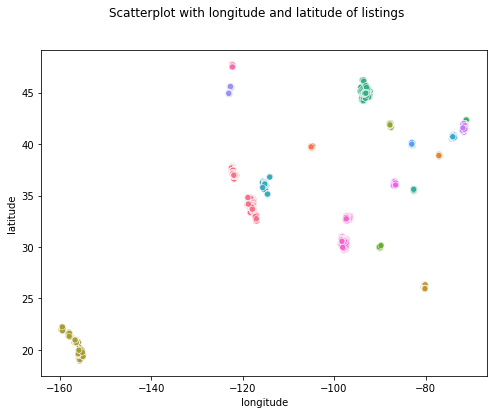

In [354]:
# Using scatterplot() from seaborn 
# Specifying hue='state', meaning that datapoints will be grouped and colored based on the state.

fig, ax = plt.subplots(figsize=(8,6)) 
fig.suptitle('Scatterplot with longitude and latitude of listings')
sns.scatterplot(data=df, x='longitude', y ='latitude', hue='state', legend=False, ax=ax)

__12. Create a matrix containing the correlations between the different columns in `df`. Plot it as a heatmap using Seaborn or similar. What does the plot tell you about correlations? Which columns are the most correlated to `price`?__

<AxesSubplot:>

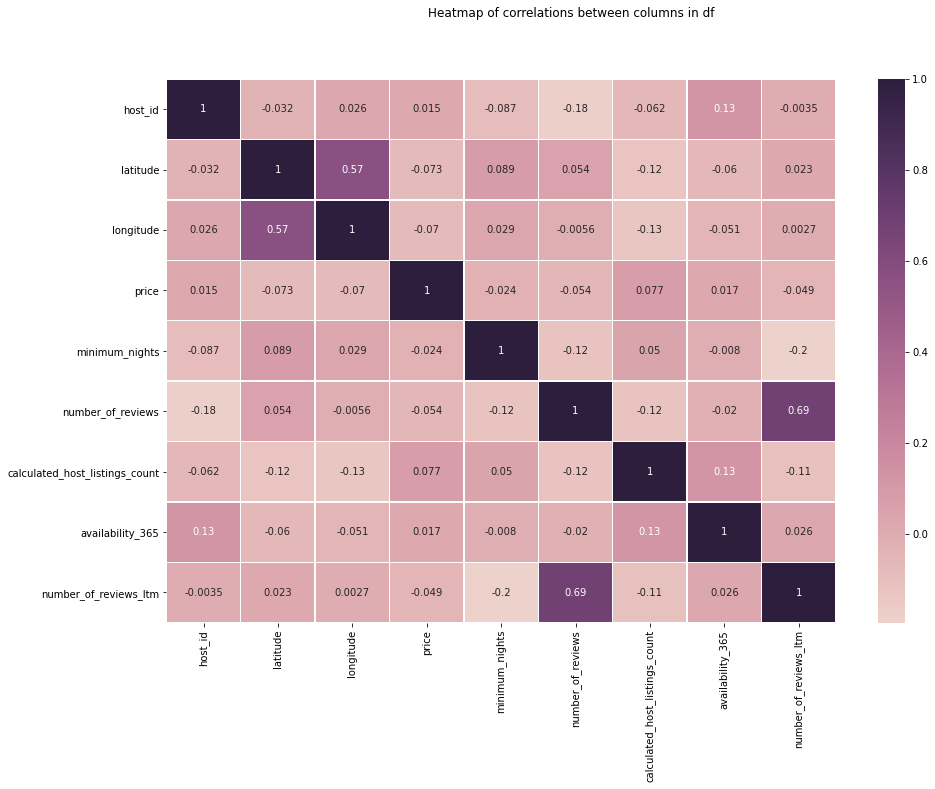

In [355]:
# Increasing the size of the heatmap and adding a label
fig, ax = plt.subplots(figsize=(15,10))
fig.suptitle('Heatmap of correlations between columns in df')

# Plotting the existing correlations between the different columns. Setting annot = True to view datavalues in each cell.
sns.heatmap(df.corr(), annot=True, linewidth=.3, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

In the heatmap above we observe the correlation between the different columns in the dataframe `df`. The darker the color, the higher the correlation is. 

We can see that there is a high colleration between `number_of_reviewers_ltm` and `number_of_reviews`, as well as `calculated_host_listings_count` and `availability_365`, and `longitude` and `latitude`.

Looking at the `price`-column, the column which is most correlated to this one is `calculated_host_listings_count`. 